In [1]:
import numpy as np
import pandas as pd
import time
import os
from scipy import stats
import matplotlib 
from matplotlib import pyplot as plt
from scipy.optimize import brute


In [2]:
weibull_info = pd.read_csv("../../Figures/MCMCFigures/Weibull_Parameters_145.csv", index_col = 0)
print weibull_info.shape
weibull_info.head()

(145, 4)


,ID,Gamma,Location,Alpha
0,1007.0,2.614027,4.447527,1.283371
1,1021.0,3.269655,4.989150,1.129664
2,1025.0,2.249906,4.965337,0.938566
3,1041.0,1.856930,4.863439,0.972277
4,10518.0,1.596694,5.781111,0.761953


In [7]:
#load _periods to see period distances
period_info = pd.read_csv("../../csvs/initial_orbital_elements.csv", index_col =0 )
#period_info.head()
subset = period_info.loc[weibull_info["ID"].values]
subset.head()

,runstring,Stable,instability_time,Rel_Eerr,RHill12,RHill23,beta12,beta23,m1,a1,...,Omega2,f2,m3,a3,P3,e3,pomega3,inc3,Omega3,f3
1007.0,0001007.bin,0,1.740364e+05,1.526402e-06,0.027468,0.037870,26.723271,22.505187,3.696734e-05,1.0,...,1.184477,-0.471182,6.046862e-06,2.586299,4.159138,0.277217,-0.620559,0.007811,0.760803,-0.518981
1021.0,0001021.bin,0,2.689650e+06,1.961156e-07,0.011243,0.007287,8.309853,12.848921,3.920644e-06,1.0,...,1.438186,-2.529970,5.454607e-07,1.187061,1.293327,0.000120,2.178284,0.007035,0.611426,-4.060639
1025.0,0001025.bin,0,6.744500e+05,9.745464e-10,0.005722,0.007728,7.646631,20.628668,4.261191e-07,1.0,...,1.883763,-1.879708,1.081668e-06,1.203163,1.319733,0.049713,-5.571825,0.001377,-3.034284,0.044014
1041.0,0001041.bin,0,7.144115e+05,1.061513e-07,0.011382,0.011746,23.390767,6.999554,2.135233e-06,1.0,...,-2.019320,0.688793,1.064862e-07,1.348441,1.565838,0.041868,-0.187665,0.079920,-1.095712,-1.881897
10518.0,0010518.bin,0,9.271272e+06,4.160501e-07,0.013379,0.031345,17.739928,21.167394,6.041495e-06,1.0,...,1.606045,2.382316,4.762643e-05,1.900831,2.620615,0.132402,5.200809,0.063746,2.934995,-2.231989


In [116]:
#load short int features and see if that is any bit useful
short_int = pd.read_csv("../../csvs/BetaFeats/sifOrbsMore=10000.0Nout=100window=10.csv", index_col=0)
int_subset = short_int.loc[weibull_info["ID"].values]
int_subset.head()

,runstring,t_final_short,Rel_Eerr_short,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,...,min_iH3,avg_ecross3,std_ecross3,max_ecross3,min_ecross3,norm_a3_slope,wall_time,Stable,instability_time,Rel_Eerr
1007.0,0001007.bin,10000.0,5.206029e-08,26.732355,0.043882,26.638832,26.835809,22.424908,0.341923,21.606912,...,0.499930,0.039808,0.016937,0.857421,0.714777,-1.082651e-08,0.388264,0.0,1.740364e+05,1.526402e-06
1021.0,0001021.bin,10000.0,4.398308e-09,8.336482,0.024231,8.275415,8.384433,12.815548,0.038202,12.731072,...,1.145887,0.367925,0.174110,0.029881,0.001526,-3.842643e-12,0.383372,0.0,2.689650e+06,1.961156e-07
1025.0,0001025.bin,10000.0,7.781939e-09,7.685149,0.040514,7.621851,7.766875,20.608268,0.027135,20.550142,...,0.214459,0.010761,0.000136,0.375722,0.365670,2.354612e-12,0.382403,0.0,6.744500e+05,9.745464e-10
1041.0,0001041.bin,10000.0,1.961802e-09,23.388121,0.004581,23.377418,23.395434,7.072915,0.105877,6.906414,...,9.175108,1.434662,0.050702,0.712976,0.578283,2.174409e-12,0.393527,0.0,7.144115e+05,1.061513e-07
10518.0,0010518.bin,10000.0,8.140560e-09,17.738335,0.016146,17.683682,17.771795,21.168231,0.009907,21.148539,...,3.865721,0.184720,0.000841,0.379382,0.373758,1.147297e-12,0.314230,0.0,9.271272e+06,4.160501e-07


In [8]:
#generate labels
#start = np.zeros_like(weibull_info.shape[0])
exp_list = np.loadtxt("../../../ExpDists.txt")
gauss_list = np.loadtxt("../../../GaussLike.txt")
ids = weibull_info["ID"]
exp_labels = np.in1d( ids, exp_list).astype(int)
gauss_labels = np.in1d(ids, gauss_list).astype(int) *2
total_labels = exp_labels + gauss_labels
print total_labels

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 2 0 0 1 0 0 2 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 2 0 0 0 0 0 0 2 2 0 2 2 0 0 0 0 0 2 1 0 1 0 1 2 0 2 1 2 1 0 2
 2 0 0 2 2 2 2 0 1 0 0 0 0 0 0 0 0 2 1 1 0 0 1 0 0 0 1 2 0 0 0 1 1 0]


In [9]:
def period_func(vals, p_bls, p_inj):
    a, b = vals
    a = np.rint(a)
    b = np.rint(b)   
    return np.abs((a*p_bls - b*p_inj) / 0.5/(a*p_bls + b*p_inj))

In [107]:
from scipy.optimize import brute
rranges = (slice(1,20, 1), slice(1, 20, 1))
period_distances = np.zeros((subset.shape[0], 2))
first_harmonics = np.zeros_like(period_distances)
second_harmonics = np.zeros_like(period_distances)
first_order = np.zeros(subset.shape[0])
second_order = np.zeros_like(first_order)

for i in range(int(subset.shape[0])):
    #results = brute(period_func, ranges=rranges, args=(data_table["BLS_Period_1_0"][i], planet_periods[i]), full_output=True, finish= None)

    results = brute(period_func, ranges=rranges, args=(subset["P1"].values[i], subset["P2"].values[i]), full_output=True, finish= None)
    results2 = brute(period_func, ranges=rranges, args=(subset["P2"].values[i], subset["P3"].values[i]), full_output=True, finish= None)
    distance1 = period_func(results[0],subset["P1"].values[i], subset["P2"].values[i])
    distance2 = period_func(results2[0],subset["P2"].values[i], subset["P3"].values[i])
    print results[0], results2[0], subset[["P1", "P2", "P3"]].values[i], "Label", total_labels[i]
    period_distances[i, 0] = distance1
    period_distances[i, 1] = distance2
    first_harmonics[i] = results[0]
    second_harmonics[i] = results2[0]
    first_order[i] = np.abs(results[0][0] - results[0][1])
    second_order[i] = np.abs(results2[0][0] - results2[0][1])

[ 16.   7.] [ 11.   6.] [ 0.99998152  2.28333232  4.15913796] Label 0
[ 8.  7.] [ 17.  15.] [ 0.99999804  1.14336046  1.29332706] Label 0
[ 16.  15.] [ 16.  13.] [ 0.99999979  1.06634007  1.31973309] Label 0
[ 10.   7.] [ 11.  10.] [ 0.99999893  1.42484032  1.56583813] Label 0
[ 11.   8.] [ 19.  10.] [ 0.99999698  1.37636474  2.62061482] Label 0
[ 17.  14.] [ 17.  13.] [ 0.99996735  1.20899867  1.58939447] Label 0
[ 16.   9.] [ 5.  3.] [ 0.99999515  1.77941001  2.983734  ] Label 0
[ 19.  17.] [ 15.  14.] [ 0.99999692  1.12001413  1.19999427] Label 0
[ 15.   7.] [ 17.  14.] [ 0.99997294  2.13487922  2.58845696] Label 0
[ 8.  7.] [ 19.  18.] [ 0.99999992  1.14148938  1.1820886 ] Label 0
[ 11.  10.] [ 13.  11.] [ 0.99999994  1.10216564  1.29465978] Label 0
[ 12.  11.] [ 12.   7.] [ 0.99999921  1.08890841  1.86814179] Label 0
[ 13.  12.] [ 18.  13.] [ 0.99999963  1.0843389   1.49642898] Label 0
[ 2.  1.] [ 10.   9.] [ 0.99998245  2.00486192  2.21823612] Label 0
[ 10.   9.] [ 8.  7.] [ 0.99

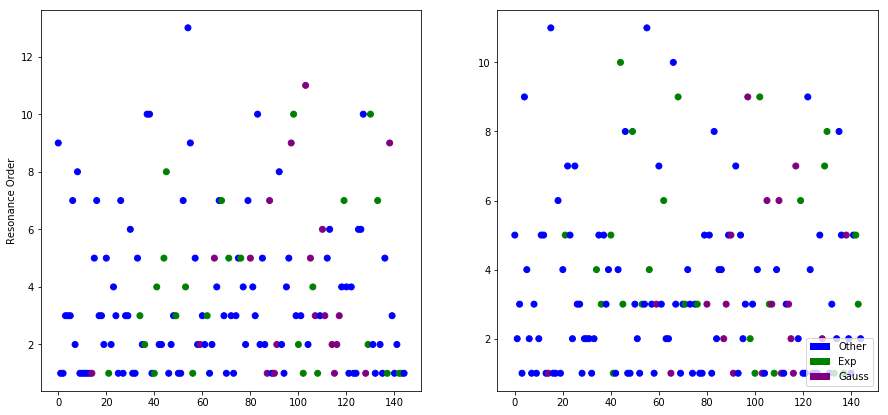

In [108]:
x = np.arange(145)
cols = ["blue", "green", "purple"]
c_map = matplotlib.colors.ListedColormap(cols)
fig = plt.figure(figsize= (15, 7))
ax1 = fig.add_subplot("121")
ax2 = fig.add_subplot("122")
ax1.scatter(x, first_order, c = total_labels, cmap=c_map )
ax2.scatter(x, second_order, c = total_labels, cmap=c_map )
recs= []
for i in range(0,len(cols)):
    recs.append(matplotlib.patches.Rectangle((0,0),1,1,fc=cols[i]))
plt.legend(recs,["Other", "Exp", "Gauss"],loc=4)
ax1.set_ylabel("Resonance Order")
plt.show()
#plot resonance eorder for all the sytems

[ 5.  1.  1.  1.  3.  3.  2.  1.  3.  1.  1.  1.  1.  1.  1.  5.  1.  1.
  3.  1.  4.  1.  2.  4.  2.  1.  3.  1.  1.  2.  2.  1.  1.  2.  3.  2.
  2.  5.  3.  1.  1.  1.  1.  2.  5.  3.  1.  1.  1.  3.  1.  1.  1.  3.
  3.  9.  1.  3.  1.  2.  3.  2.  3.  1.  2.  1.  4.  3.  7.  1.  1.  3.
  3.  1.  1.  3.  3.  1.  1.  5.  3.  4.  1.  8.  2.  4.  2.  1.  3.  1.
  1.  1.  7.  1.  1.  2.  3.  9.  2.  3.  1.  3.  1.  1.  1.  5.  3.  3.
  1.  3.  6.  1.  1.  3.  2.  1.  1.  3.  2.  6.  1.  1.  4.  1.  1.  1.
  1.  5.  1.  2.  8.  1.  1.  1.  2.  1.  5.  1.  5.  2.  1.  2.  1.  1.
  1.]


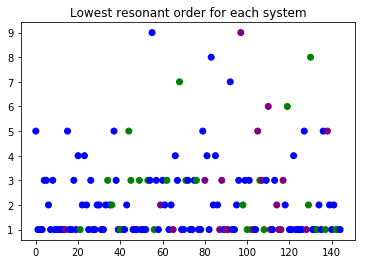

In [121]:
lowest_order = np.asarray([first_order, second_order]).min(axis =0)
print lowest_order
plt.scatter(x, lowest_order, c= total_labels, cmap = c_map)
plt.title("Lowest resonant order for each system")
plt.show()

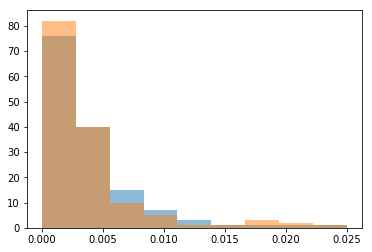

In [127]:
#IM CURIOS OF THE ERROR, itll tell how close to resonance it really is
bins = np.linspace(0,0.025, 10)
plt.hist(period_distances[:,1], alpha  = 0.5, bins = bins)
plt.hist(period_distances[:,0], alpha = 0.5, bins = bins)
plt.show()

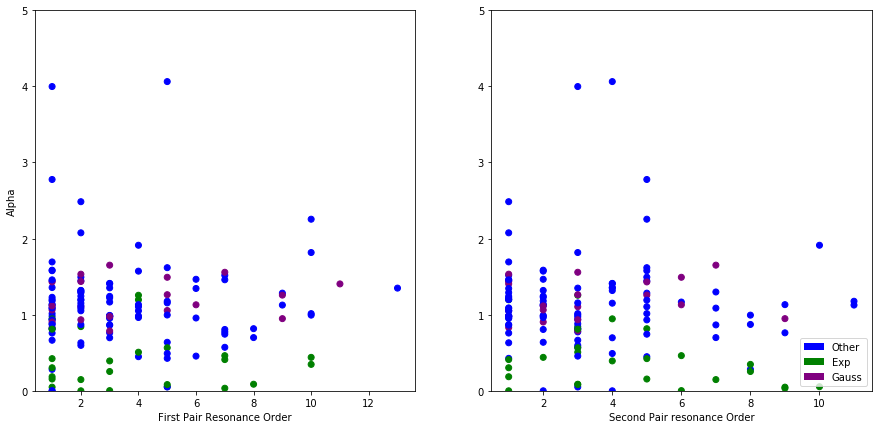

In [110]:
#try constraining the spread of the system
fig = plt.figure(figsize= (15, 7))
ax1 = fig.add_subplot("121")
ax2 = fig.add_subplot("122")
ax1.scatter(first_order, weibull_info["Alpha"], c = total_labels, cmap=c_map )
ax2.scatter(second_order,  weibull_info["Alpha"], c = total_labels, cmap=c_map )
ax1.set_xlabel("First Pair Resonance Order")
ax1.set_ylabel("Alpha")
ax2.set_xlabel("Second Pair resonance Order")
recs= []
for i in range(0,len(cols)):
    recs.append(matplotlib.patches.Rectangle((0,0),1,1,fc=cols[i]))
plt.legend(recs,["Other", "Exp", "Gauss"],loc=4)
ax1.set_ylim([0,5])
ax2.set_ylim([0,5])
plt.show()

#seems like exponential distribitions tend to be very narrow, less than 
#gaussians seemed to have a similar spread to each other, around 1.25? # seems to have the same sigma after all

['runstring' 'Stable' 'instability_time' 'Rel_Eerr' 'RHill12' 'RHill23'
 'beta12' 'beta23' 'm1' 'a1' 'P1' 'e1' 'pomega1' 'inc1' 'Omega1' 'f1' 'm2'
 'a2' 'P2' 'e2' 'pomega2' 'inc2' 'Omega2' 'f2' 'm3' 'a3' 'P3' 'e3'
 'pomega3' 'inc3' 'Omega3' 'f3']


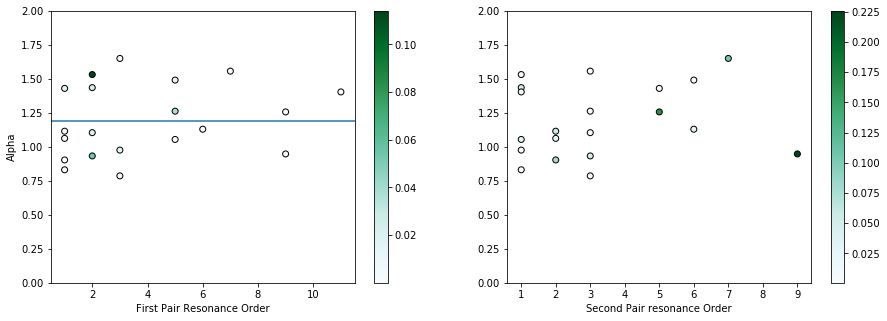

In [139]:
#plt.scatter(first_order, weibull_info["Alpha"], c = total_labels, cmap = c_map, marker = ".")
#plt.show()
#try constraining the spread of the system
#How is the spacing of the exp distribtions (betas?)
fig = plt.figure(figsize= (15, 5))
ax1 = fig.add_subplot("121")
ax2 = fig.add_subplot("122")
ind = np.where(total_labels==2)[0]

print subset.columns.values

vals =  subset["e1"].values[ind]
vals2 = subset["e2"].values[ind]
plot = ax1.scatter(first_order[ind], weibull_info["Alpha"][ind], c = vals, cmap = "BuGn", edgecolors="black") #c = total_labels, cmap=c_map )
plot2 = ax2.scatter(second_order[ind],  weibull_info["Alpha"][ind], c = vals2, cmap = "BuGn", edgecolors="black")#, c = total_labels, cmap=c_map )

ax1.set_xlabel("First Pair Resonance Order")
ax1.set_ylabel("Alpha")
#ax1.colorbar()
ax2.set_xlabel("Second Pair resonance Order")

ax1.set_ylim([0,2])
ax2.set_ylim([0,2])
plt.colorbar(plot, ax = ax1)
plt.colorbar(plot2, ax = ax2)
#plt.show()

#average alpha
avg_alpha = np.average(weibull_info["Alpha"][ind])
ax1.axhline(y = avg_alpha)
plt.show()

[0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0]
[  6  13  24  29  32  89  93 111 115 116 121 126 131 134 135 140]


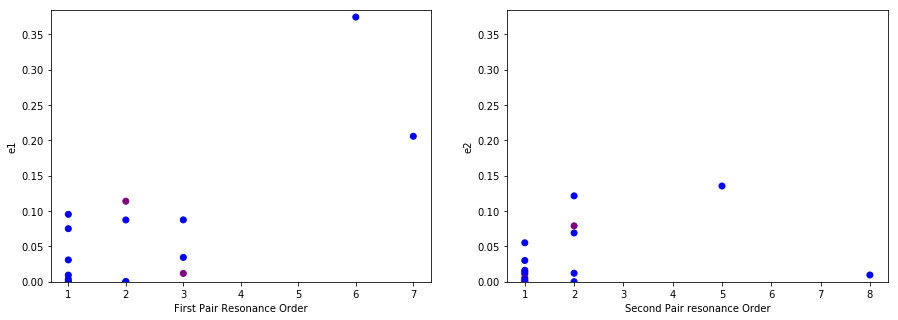

In [165]:
#try constraining the spread of the system wiht all the samples
fig = plt.figure(figsize= (15, 5))
ax1 = fig.add_subplot("121")
ax2 = fig.add_subplot("122")
thresh = 0.05
ind = np.where((first_harmonics[:,0] <=5) + (second_harmonics[:,0] <=5) )[0]
print total_labels[ind]
print ind
val1 = "e1"
val2 = "e2"

e1 =  subset[val1].values[ind]
e2 = subset[val2].values[ind]
plot = ax1.scatter(first_order[ind],e1, c = total_labels[ind], cmap=c_map) #c = total_labels, cmap=c_map )
ax2.scatter(second_order[ind],  e2, c = total_labels[ind], cmap = c_map)#, c = total_labels, cmap=c_map )

ax1.set_xlabel("First Pair Resonance Order")
ax1.set_ylabel(val1)
ax2.set_ylabel(val2)
ax2.set_xlabel("Second Pair resonance Order")

y_max = np.asarray([e1, e2]).max()
ax1.set_ylim([0,y_max+0.01])
ax2.set_ylim([0,y_max+0.01])
#plt.colorbar(plot, ax = ax1)
plt.show()



['runstring' 't_final_short' 'Rel_Eerr_short' 'avg_beta12' 'std_beta12'
 'min_beta12' 'max_beta12' 'avg_beta23' 'std_beta23' 'min_beta23'
 'max_beta23' 'avg_a1' 'std_a1' 'max_a1' 'min_a1' 'norm_std_a1'
 'norm_max_a1' 'norm_std_window10_a1' 'norm_max_window10_a1' 'avg_e1'
 'std_e1' 'max_e1' 'min_e1' 'norm_std_e1' 'norm_max_e1'
 'norm_std_window10_e1' 'norm_max_window10_e1' 'avg_inc1' 'std_inc1'
 'max_inc1' 'min_inc1' 'norm_std_inc1' 'norm_max_inc1'
 'norm_std_window10_inc1' 'norm_max_window10_inc1' 'avg_eH1' 'std_eH1'
 'max_eH1' 'min_eH1' 'avg_iH1' 'std_iH1' 'max_iH1' 'min_iH1' 'avg_ecross1'
 'std_ecross1' 'max_ecross1' 'min_ecross1' 'norm_a1_slope' 'avg_a2'
 'std_a2' 'max_a2' 'min_a2' 'norm_std_a2' 'norm_max_a2'
 'norm_std_window10_a2' 'norm_max_window10_a2' 'avg_e2' 'std_e2' 'max_e2'
 'min_e2' 'norm_std_e2' 'norm_max_e2' 'norm_std_window10_e2'
 'norm_max_window10_e2' 'avg_inc2' 'std_inc2' 'max_inc2' 'min_inc2'
 'norm_std_inc2' 'norm_max_inc2' 'norm_std_window10_inc2'
 'norm_max_window

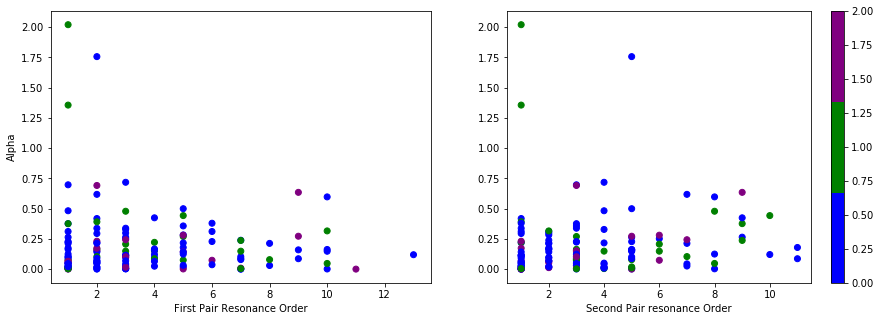

In [171]:
#plot resonant features against short int features


fig = plt.figure(figsize= (15, 5))
ax1 = fig.add_subplot("121")
ax2 = fig.add_subplot("122")
ind = np.where(total_labels==1)[0]
print int_subset.columns.values

min_ecross = int_subset[["max_ecross1", "max_ecross2", "max_ecross3"]].min(axis = 1)

e1 =  int_subset["max_ecross3"].values#[ind]
e2 = int_subset["max_ecross3"].values#[ind]
plot = ax1.scatter(first_order, min_ecross,c = total_labels, cmap=c_map )
ax2.scatter(second_order,  min_ecross,  c = total_labels, cmap=c_map )

ax1.set_xlabel("First Pair Resonance Order")
ax1.set_ylabel("Alpha")
ax2.set_xlabel("Second Pair resonance Order")

#ax1.set_ylim([0,2])
#ax2.set_ylim([0,2])
plt.colorbar(plot)
plt.show()



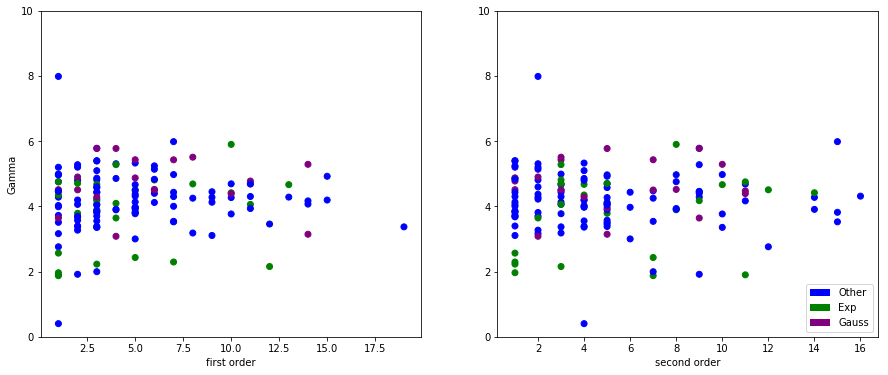

In [95]:
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot("121")
ax2 = fig.add_subplot("122")
ax1.scatter(first_order, weibull_info["Location"], c = total_labels, cmap = c_map)
ax1.set_ylim([0,10])
ax2.set_ylim([0,10])
ax2.scatter(second_order, weibull_info["Location"], c = total_labels, cmap = c_map)
ax1.set_xlabel("first order")
ax2.set_xlabel("second order")
ax1.set_ylabel("Gamma")
for i in range(0,len(cols)):
    recs.append(matplotlib.patches.Rectangle((0,0),1,1,fc=cols[i]))
plt.legend(recs,["Other", "Exp", "Gauss"],loc=4)
plt.show()




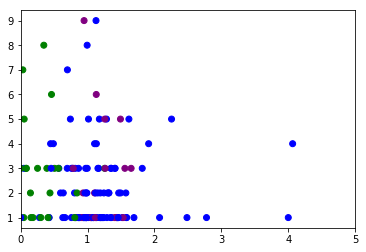

55      1438.0
68      1601.0
83      1689.0
92     19898.0
97     20972.0
130     4753.0
Name: ID, dtype: float64
[ 9.  7.  8.  7.  9.  8.]
runstring           0001601.bin
Stable                        0
instability_time          27215
Rel_Eerr            1.15781e-06
RHill12               0.0193572
RHill23               0.0376034
beta12                  24.0086
beta23                  22.0824
m1                  1.51084e-06
a1                            1
P1                     0.999999
e1                      0.11401
pomega1                 -2.9986
inc1                  0.0406272
Omega1                 -2.38763
f1                    -0.399629
m2                  2.02485e-05
a2                      1.46474
P2                       1.7727
e2                      0.23174
pomega2                 2.94187
inc2                 0.00385835
Omega2                  1.85923
f2                      1.45607
m3                  3.05117e-05
a3                      2.29511
P3                      3.4

In [177]:
#look at other systems with second order less than 
plt.scatter( weibull_info["Alpha"], lowest_order,  c = total_labels, cmap = c_map)
plt.xlim([0,5])
plt.show()
print weibull_info["ID"][np.where(lowest_order>6)[0]] # 1601
print lowest_order[np.where(lowest_order>6)[0]]
print subset.loc[1601]